In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_.csv to diabetes_.csv


In [ ]:
import pandas as pd

df = pd.read_csv("diabetes_.csv")

print(df.head())
print(df.shape)
print(df.info())
print(df.isnull().sum())
print(df.describe())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose             

In [ ]:
df = pd.read_csv("diabetes_.csv")

df = df.fillna(df.median())

print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
import numpy as np

X = df.drop("Outcome", axis=1).values
y = df["Outcome"].values

np.random.seed(42)
indices = np.random.permutation(len(X))

split = int(0.7 * len(X))
train_idx, test_idx = indices[:split], indices[split:]

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(537, 8) (231, 8)
(537,) (231,)


In [ ]:
import numpy as np

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def predict_single(X_train, y_train, query, k=3):
    distances = []
    for i in range(len(X_train)):
        dist = euclidean_distance(query, X_train[i])
        distances.append((dist, y_train[i]))
    distances.sort(key=lambda x: x[0])
    neighbors = distances[:k]
    labels = [label for _, label in neighbors]
    return max(set(labels), key=labels.count)

def predict(X_train, y_train, X_test, k=3):
    y_pred = []
    for query in X_test:
        label = predict_single(X_train, y_train, query, k)
        y_pred.append(label)
    return np.array(y_pred)

def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)



k = 5


y_pred = predict(X_train, y_train, X_test, k)


acc = accuracy(y_test, y_pred)


print("Predicted labels:", y_pred)
print("Actual labels:   ", y_test)
print(f"Accuracy: {acc*100:.2f}%")





Predicted labels: [0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0
 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1
 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0
 1 1 1 0 1 0 1 1 0]
Actual labels:    [0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0
 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0
 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1
 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1
 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0
 0 1 0 0 0 0 1 1 0]
Accuracy: 71.43%


In [ ]:
X_min = X_train.min(axis=0)
X_max = X_train.max(axis=0)
X_train_scaled = (X_train - X_min) / (X_max - X_min)
X_test_scaled = (X_test - X_min) / (X_max - X_min)


y_pred_scaled = predict(X_train_scaled, y_train, X_test_scaled, k)
acc_scaled = accuracy(y_test, y_pred_scaled)
print(f"Accuracy (Scaled Data): {acc_scaled*100:.2f}%")

Accuracy (Scaled Data): 72.73%


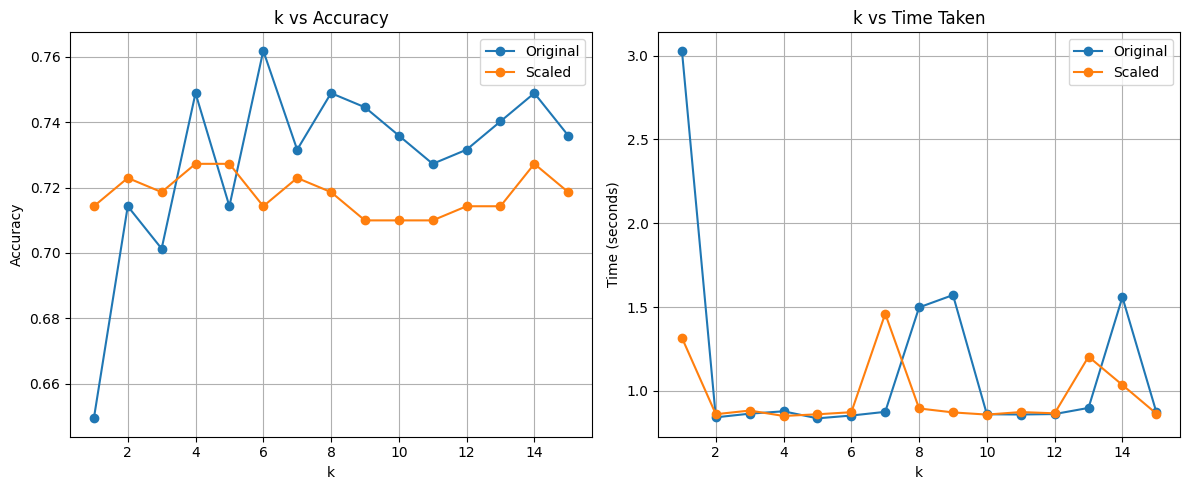

In [ ]:
import time
import matplotlib.pyplot as plt
k_values = range(1, 16)
acc_orig_list, acc_scaled_list = [], []
time_orig_list, time_scaled_list = [], []

for k in k_values:

    start = time.time()
    y_pred_orig = predict(X_train, y_train, X_test, k)
    end = time.time()
    acc_orig_list.append(accuracy(y_test, y_pred_orig))
    time_orig_list.append(end - start)


    start = time.time()
    y_pred_scaled = predict(X_train_scaled, y_train, X_test_scaled, k)
    end = time.time()
    acc_scaled_list.append(accuracy(y_test, y_pred_scaled))
    time_scaled_list.append(end - start)


plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(k_values, acc_orig_list, marker='o', label='Original')
plt.plot(k_values, acc_scaled_list, marker='o', label='Scaled')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k vs Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(k_values, time_orig_list, marker='o', label='Original')
plt.plot(k_values, time_scaled_list, marker='o', label='Scaled')
plt.xlabel('k')
plt.ylabel('Time (seconds)')
plt.title('k vs Time Taken')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()